# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)

In [293]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Primeiro caso de teste

In [294]:
#função fitness
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


In [295]:
#população inicial (primeira geração)
n_pop = 100
dim = 3
pop=criaPop(n_pop,dim)
pop

array([[1.33128150e-01, 9.48059788e-01, 8.60846939e-01],
       [4.35883531e-01, 4.61047009e-01, 3.78404692e-02],
       [8.70795029e-01, 2.43719074e-01, 8.89954504e-02],
       [3.46949613e-01, 1.17376202e-02, 3.60351416e-02],
       [4.76352418e-01, 7.31019872e-01, 7.95478578e-01],
       [4.11562765e-01, 3.88486304e-01, 7.75646404e-01],
       [5.02100061e-01, 3.61550092e-01, 6.08049450e-02],
       [3.79611609e-01, 3.81607543e-01, 9.62723644e-01],
       [4.25749430e-01, 1.25543064e-01, 1.19043119e-01],
       [3.65771662e-01, 5.26624657e-01, 9.47452047e-01],
       [7.90696226e-01, 3.59588379e-01, 7.93644746e-01],
       [6.12788687e-01, 5.01744783e-01, 5.11162080e-01],
       [9.40848800e-01, 5.07015524e-01, 8.92261135e-01],
       [4.12158944e-01, 3.39686398e-01, 9.64002216e-01],
       [9.54426953e-01, 2.16292102e-01, 6.22443248e-01],
       [1.98096856e-01, 8.15317942e-01, 5.92535275e-01],
       [4.99984427e-01, 8.55597123e-01, 1.62281701e-03],
       [2.78076478e-01, 1.09898

In [296]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)
pop

array([[-2.20123110e+00,  3.68835873e+00,  5.16508164e+00],
       [-3.84698815e-01,  7.66282055e-01,  2.27042815e-01],
       [ 2.22477017e+00, -5.37685554e-01,  5.33972702e-01],
       [-9.18302322e-01, -1.92957428e+00,  2.16210850e-01],
       [-1.41885492e-01,  2.38611923e+00,  4.77287147e+00],
       [-5.30623411e-01,  3.30917825e-01,  4.65387843e+00],
       [ 1.26003681e-02,  1.69300550e-01,  3.64829670e-01],
       [-7.22330348e-01,  2.89645257e-01,  5.77634187e+00],
       [-4.45503421e-01, -1.24674162e+00,  7.14258715e-01],
       [-8.05370029e-01,  1.15974794e+00,  5.68471228e+00],
       [ 1.74417735e+00,  1.57530275e-01,  4.76186848e+00],
       [ 6.76732123e-01,  1.01046870e+00,  3.06697248e+00],
       [ 2.64509280e+00,  1.04209315e+00,  5.35356681e+00],
       [-5.27046338e-01,  3.81183859e-02,  5.78401329e+00],
       [ 2.72656172e+00, -7.02247390e-01,  3.73465949e+00],
       [-1.81141887e+00,  2.89190765e+00,  3.55521165e+00],
       [-9.34380982e-05,  3.13358274e+00

In [297]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)
pop

array([[-2.20123110e+00,  3.68835873e+00,  5.16508164e+00,
         3.00117264e+02],
       [-3.84698815e-01,  7.66282055e-01,  2.27042815e-01,
         2.80293854e+02],
       [ 2.22477017e+00, -5.37685554e-01,  5.33972702e-01,
         3.26236298e+02],
       [-9.18302322e-01, -1.92957428e+00,  2.16210850e-01,
         5.78114379e+02],
       [-1.41885492e-01,  2.38611923e+00,  4.77287147e+00,
         1.10312983e+02],
       [-5.30623411e-01,  3.30917825e-01,  4.65387843e+00,
         1.61204202e+02],
       [ 1.26003681e-02,  1.69300550e-01,  3.64829670e-01,
         2.85102470e+02],
       [-7.22330348e-01,  2.89645257e-01,  5.77634187e+00,
         3.19412710e+02],
       [-4.45503421e-01, -1.24674162e+00,  7.14258715e-01,
         3.88459820e+02],
       [-8.05370029e-01,  1.15974794e+00,  5.68471228e+00,
         2.62944481e+02],
       [ 1.74417735e+00,  1.57530275e-01,  4.76186848e+00,
         1.66557309e+02],
       [ 6.76732123e-01,  1.01046870e+00,  3.06697248e+00,
      

In [298]:
#ordenação
pop_ord = pop[abs(pop[0:, -1]).argsort()]
pop_ord

array([[ 1.64788959e+00,  1.69806541e+00,  2.88997683e+00,
         6.38405220e+00],
       [-2.33803948e-02,  2.03276509e+00,  2.78864271e+00,
         1.18347024e+01],
       [ 7.43854023e-01,  2.33823594e+00,  2.42761296e+00,
         1.27729862e+01],
       [ 6.76732123e-01,  1.01046870e+00,  3.06697248e+00,
         2.07630244e+01],
       [-7.17262672e-02,  2.35376064e+00,  2.34878772e+00,
         2.67112269e+01],
       [ 1.58267214e+00,  1.31658095e+00,  3.70256157e+00,
         2.75440829e+01],
       [ 2.38169847e+00,  1.39609635e+00,  2.79887764e+00,
         2.75984050e+01],
       [ 1.41597357e+00,  1.68545522e+00,  3.98889122e+00,
         3.30462842e+01],
       [ 2.46738420e+00,  2.64184495e+00,  2.57893144e+00,
         3.50904248e+01],
       [-8.11654401e-01,  1.76449771e+00,  2.69386307e+00,
         3.67417379e+01],
       [ 1.08023926e+00,  9.64688538e-01,  3.88571253e+00,
         4.50363806e+01],
       [ 2.15407247e+00,  1.82636494e+00,  1.97591689e+00,
      

In [299]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]
melhor_pop_inicial

array([[ 1.64788959e+00,  1.69806541e+00,  2.88997683e+00,
         6.38405220e+00],
       [-2.33803948e-02,  2.03276509e+00,  2.78864271e+00,
         1.18347024e+01],
       [ 7.43854023e-01,  2.33823594e+00,  2.42761296e+00,
         1.27729862e+01],
       [ 6.76732123e-01,  1.01046870e+00,  3.06697248e+00,
         2.07630244e+01],
       [-7.17262672e-02,  2.35376064e+00,  2.34878772e+00,
         2.67112269e+01],
       [ 1.58267214e+00,  1.31658095e+00,  3.70256157e+00,
         2.75440829e+01],
       [ 2.38169847e+00,  1.39609635e+00,  2.79887764e+00,
         2.75984050e+01],
       [ 1.41597357e+00,  1.68545522e+00,  3.98889122e+00,
         3.30462842e+01],
       [ 2.46738420e+00,  2.64184495e+00,  2.57893144e+00,
         3.50904248e+01],
       [-8.11654401e-01,  1.76449771e+00,  2.69386307e+00,
         3.67417379e+01],
       [ 1.08023926e+00,  9.64688538e-01,  3.88571253e+00,
         4.50363806e+01],
       [ 2.15407247e+00,  1.82636494e+00,  1.97591689e+00,
      

In [300]:
#contagem de população estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [330]:
tabela = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop_inicial.copy()

            #novos 50% da população
            nova_pop = criaPop(int(n_pop/2),dim)

            #converter para as faixas
            nova_pop = converter1(nova_pop)

            #fitness da nova população
            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[abs(nova_melhor_pop[0:, -1]).argsort()]

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

            nova_pop = criaPop(int(n_pop/2),dim)

            nova_pop = converter1(nova_pop)

            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela = pd.concat([tabela, pd.DataFrame(melhor_i)], axis=1)
    #print('Número de iterações para a convergência: ',i+1)

#media e desvio padrao dos fits
desvioP = np.std(tabela,axis=1)
media = np.mean(tabela,axis=1)
desvioSup = media + desvioP
desvioInf = media - desvioP
tabela

,0,0,0,0,0
0,6.384052,6.384052,6.384052,6.384052,6.384052
1,6.384052,6.384052,6.384052,6.384052,6.384052
2,5.545077,6.384052,6.384052,4.972708,6.384052
3,5.545077,3.221736,6.384052,4.972708,6.384052
4,5.545077,3.221736,6.384052,4.972708,6.384052
...,...,...,...,...,...
95,0.241789,0.563575,0.467669,0.618356,1.194633
96,0.241789,0.563575,0.467669,0.618356,1.194633
97,0.241789,0.563575,0.467669,0.618356,1.194633
98,0.241789,0.563575,0.467669,0.618356,1.194633


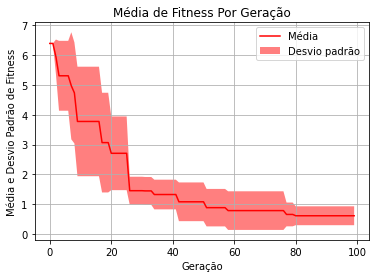


Número de iterações para a última convergência:  100


In [338]:
plt.title("Média de Fitness Por Geração")
plt.xlabel("Geração")
plt.ylabel("Média e Desvio Padrão de Fitness")
plt.plot(media, color = "red", label = "Média")
plt.fill_between(range(len(media)), desvioSup, desvioInf, facecolor='red', alpha=0.5, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)

## Segundo caso de teste

In [303]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [304]:
tamanho_2 = palavraAlvo.size
dim_2 = 1

In [305]:
def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [306]:
#palavra aleatoria (ja convertida para os limites da palavra alvo)
palavra = [converter2(criaPop(tamanho_2,dim_2))]
palavra

[array([ 79.37717354, 109.19251032,  84.31407339,  89.60166924,
         88.17590116,  90.41767178,  70.22531288, 100.84471628,
         87.16046449,  66.44584287,  82.73366819,  97.95453191,
        107.50167963,  95.08505838,  71.46918078,  72.63726403,
         94.07391497,  85.77151634, 123.65123313,  86.14836032,
        122.3268339 , 116.42978908, 113.77788001, 107.30340723,
         84.09205803,  68.66197032, 103.62617259, 110.89789616,
         94.02983119,  94.36312384])]

In [307]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T
palavra

array([[  79.37717354,  719.85821227],
       [ 109.19251032, 3208.71383894],
       [  84.31407339, 1009.14695183],
       [  89.60166924, 1373.04851277],
       [  88.17590116, 1269.41859785],
       [  90.41767178, 1434.18778098],
       [  70.22531288,  312.52274626],
       [ 100.84471628, 2332.66939759],
       [  87.16046449, 1198.0919238 ],
       [  66.44584287,  193.17783326],
       [  82.73366819,  911.23493662],
       [  97.95453191, 2061.84395406],
       [ 107.50167963, 3020.01681303],
       [  95.08505838, 1809.4864108 ],
       [  71.46918078,  358.04892534],
       [  72.63726403,  403.61870889],
       [  94.07391497, 1724.48466717],
       [  85.77151634, 1103.8684861 ],
       [ 123.65123313, 5055.81196961],
       [  86.14836032, 1129.05141544],
       [ 122.3268339 , 4869.22521844],
       [ 116.42978908, 4081.01074114],
       [ 113.77788001, 3749.22066713],
       [ 107.30340723, 2998.26413317],
       [  84.09205803,  995.09068585],
       [  68.66197032,  2

In [308]:
#ordenar
palavra_ord = palavra[abs(palavra[0:, -1]).argsort()]
#50% melhores
melhor_palavra_inicial = palavra_ord[0:int(tamanho_2/2),:]
melhor_palavra_inicial

array([[  66.44584287,  193.17783326],
       [  68.66197032,  259.69226843],
       [  70.22531288,  312.52274626],
       [  71.46918078,  358.04892534],
       [  72.63726403,  403.61870889],
       [  79.37717354,  719.85821227],
       [  82.73366819,  911.23493662],
       [  84.09205803,  995.09068585],
       [  84.31407339, 1009.14695183],
       [  85.77151634, 1103.8684861 ],
       [  86.14836032, 1129.05141544],
       [  87.16046449, 1198.0919238 ],
       [  88.17590116, 1269.41859785],
       [  89.60166924, 1373.04851277],
       [  90.41767178, 1434.18778098]])

In [309]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [326]:
tabela2 = pd.DataFrame()
for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_palavra_inicial.copy() #troca melhor_pop_inicial

            #novos 50% da população
            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            #converter para as faixas
            nova_pop = converter2(nova_pop) #troca converter1

            #fitness da nova população
            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()] 

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_2/2),:]

            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            nova_pop = converter2(nova_pop) #troca converter1

            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela2 = pd.concat([tabela2, pd.DataFrame(melhor_i)], axis=1)

#media e desvio padrao dos fits
desvioP2 = np.std(tabela2,axis=1)
media2 = np.mean(tabela2,axis=1)
desvioInf2 = media2 - desvioP2
desvioSup2 = media2 + desvioP2

tabela2

,0,0,0,0,0
0,0.770947,2.896665,2.180556,0.009264,1.214549
1,0.529915,2.896665,2.180556,0.009264,0.004935
2,0.529915,2.896665,0.067411,0.009264,0.004935
3,0.529915,2.896665,0.067411,0.009264,0.004935
4,0.529915,2.896665,0.067411,0.009264,0.004935
...,...,...,...,...,...
95,0.003802,0.000029,0.000129,0.001098,0.002674
96,0.003802,0.000029,0.000129,0.001098,0.002674
97,0.003802,0.000029,0.000129,0.001098,0.002674
98,0.003802,0.000029,0.000129,0.001098,0.002674


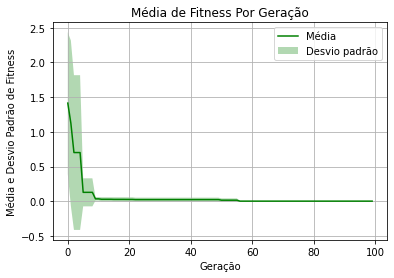


Número de iterações para a última convergência:  100


In [339]:
plt.title("Média de Fitness Por Geração")
plt.xlabel("Geração")
plt.ylabel("Média e Desvio Padrão de Fitness")
plt.plot(media2, color = "green", label = "Média")
plt.fill_between(range(len(media2)), desvioSup2, desvioInf2, facecolor='green', alpha=0.3, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)<br>

## Terceiro caso de teste

In [320]:
#função rastrigin
def fitnessFunc(self, indDecod ):
    fitness = 10*len(indDecod )
    for i in range(len(indDecod )):
        fitness += indDecod[i]**2 - (10*math.cos(2*math.pi*indDecod[i]))
    return fitness

def converter3(pop):
    lb = -5.12
    ub = 5.12
    novaPop = []
    for i in pop:
        novaPop.append(lb + (ub - lb) * i)
    return np.array(novaPop)


In [313]:
#gerar pop
tamanho_3 = 10
dim_3 = 2
pop_3 = criaPop(tamanho_3,dim_3)
pop_3 = pop_3.T
pop_3.shape

(2, 10)

In [314]:
#converte pop
pop3 = converter3(pop_3)

#fitness
for i in pop3:
    p=rastrigin(i)
p=np.array(p)
p.shape

(10,)

In [315]:
#pop add fitness
pop_3 = pop_3.T
pop_3 = np.append(pop_3,p.reshape(-1,1),axis=1)
pop_3

array([[ 0.57505407,  0.08396476, 18.7898125 ],
       [ 0.10324795,  0.04994378, 29.00083665],
       [ 0.90013221,  0.68781327, -5.15965261],
       [ 0.97744305,  0.15377436, 22.16627865],
       [ 0.67603454,  0.74431684, 16.25838263],
       [ 0.24649987,  0.51587631, -5.19462093],
       [ 0.5003539 ,  0.3920139 , -6.64876381],
       [ 0.62572302,  0.3553073 , 12.12892745],
       [ 0.70245698,  0.66631064,  5.80938331],
       [ 0.18770187,  0.89922148,  8.2029493 ]])

In [316]:
pop3 = pop_3[abs(pop_3[0:,-1]).argsort()] #ordenação
melhor_pop3_inicial= pop3[0:int(tamanho_3/2),:] #poda
melhor_pop3_inicial

array([[ 0.90013221,  0.68781327, -5.15965261],
       [ 0.24649987,  0.51587631, -5.19462093],
       [ 0.70245698,  0.66631064,  5.80938331],
       [ 0.5003539 ,  0.3920139 , -6.64876381],
       [ 0.18770187,  0.89922148,  8.2029493 ]])

In [317]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [335]:
tabela3 = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop3_inicial.copy()

            #novos 50% da população
            nova_pop = np.array(criaPop(int(tamanho_3/2),dim_3)).T
            
            #converter para as faixas
            nova_pop = converter3(nova_pop)

            #fitness da nova população
            for i in nova_pop:
                fit=rastrigin(i)
            fit=np.array(fit)
            
            nova_pop=nova_pop.T
            nova_pop=np.c_[nova_pop,fit.T]
            
            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)
            
            #reordena
            melhor_pop = nova_melhor_pop[abs(nova_melhor_pop[0:, -1]).argsort()]
            
            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_3/2),:]

            #novos 50% da população
            nova_pop = np.array(criaPop(int(tamanho_3/2),dim_3)).T
            
            #converter para as faixas
            nova_pop = converter3(nova_pop)

            #fitness da nova população
            for k in nova_pop:
                fit=rastrigin(k)
            fit=np.array(fit)
            
            nova_pop=nova_pop.T
            nova_pop=np.c_[nova_pop,fit.T]
            
            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)
            
            #reordena
            melhor_pop = nova_melhor_pop[abs(nova_melhor_pop[0:, -1]).argsort()]
            
            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])
            
            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela3 = pd.concat([tabela3, pd.DataFrame(melhor_i)], axis=1)

#media e desvio padrao dos fits
desvioP3 = np.std(tabela3,axis=1)
media3 = np.mean(tabela3,axis=1)
desvioInf3 = media3 - desvioP3
desvioSup3 = media3 + desvioP3

tabela3

,0,0,0,0,0
0,-3.637476,-0.329682,-1.018962,-1.012652,0.818490
1,-3.637476,-0.329682,-1.018962,-1.012652,0.084429
2,0.916578,-0.329682,-1.018962,-1.012652,0.084429
3,0.916578,0.207138,-1.018962,-1.012652,0.084429
4,0.916578,0.207138,-1.018962,-1.012652,0.084429
...,...,...,...,...,...
95,-0.056969,0.009265,-0.076614,-0.001210,-0.009345
96,-0.056969,0.009265,-0.076614,-0.001210,-0.009345
97,-0.056969,0.009265,-0.076614,-0.001210,-0.009345
98,-0.056969,0.009265,-0.076614,-0.001210,-0.009345


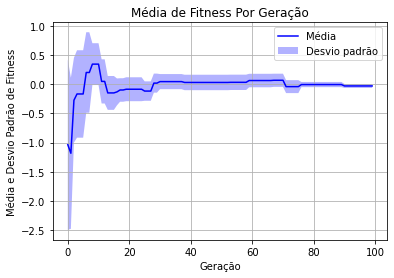


Número de iterações para a última convergência:  100


In [337]:
plt.title("Média de Fitness Por Geração")
plt.xlabel("Geração")
plt.ylabel("Média e Desvio Padrão de Fitness")
plt.plot(media3, color = "blue", label = "Média")
plt.fill_between(range(len(media3)), desvioSup3, desvioInf3, facecolor='blue', alpha=0.3, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)<br>